<a href="https://colab.research.google.com/github/GioLeo23/Convolutional-Neural-Network-for-detecting-face-masks/blob/main/CNN_Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
!ls

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 97% 158M/163M [00:01<00:00, 90.4MB/s]
100% 163M/163M [00:01<00:00, 87.8MB/s]
data  face-mask-dataset.zip  kaggle.json  sample_data


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
with_mask = os.listdir('/content/data/with_mask')
without_mask = os.listdir('/content/data/without_mask')

In [6]:
print(len(with_mask))
print(len(without_mask))

3725
3828


In [7]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828
labels = with_mask_labels + without_mask_labels

In [8]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [10]:
import tensorflow as tf
from tensorflow import keras
X = np.array(data)
y = np.array(labels)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=23)
X_train_s = X_train/255
X_test_s = X_test/255

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit(X_train_s, Y_train, validation_split=0.1, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - accuracy: 0.6583 - loss: 0.7553 - val_accuracy: 0.8777 - val_loss: 0.2956
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8885 - loss: 0.2717 - val_accuracy: 0.9058 - val_loss: 0.2269
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9081 - loss: 0.2327 - val_accuracy: 0.9223 - val_loss: 0.2058
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9309 - loss: 0.1740 - val_accuracy: 0.9157 - val_loss: 0.1956
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9400 - loss: 0.1462 - val_accuracy: 0.9124 - val_loss: 0.2347
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9505 - loss: 0.1215 - val_accuracy: 0.9240 - val_loss: 0.2495
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9630 - loss: 0.1012 - val_accuracy: 0.9240 - val_loss: 0.2400
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9735 - loss: 0.0696 - val_acc

Path of the image to be predicted: /content/1725633484398.jpg


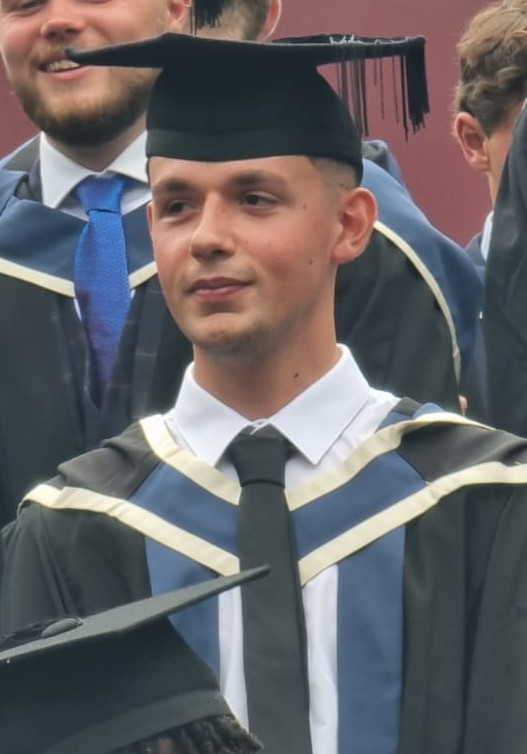

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.14848477 0.8892939 ]]
1
No Face Mask Detected


In [14]:
test_image_path = input('Path of the image to be predicted: ')
test_image = cv2.imread(test_image_path)
cv2_imshow(test_image)
test_image_resized = cv2.resize(test_image, (128,128))
test_image_scaled = test_image_resized/255
test_image_reshaped = np.reshape(test_image_scaled, [1,128,128,3])
test_prediction = model.predict(test_image_reshaped)
print(test_prediction)

test_pred_label = np.argmax(test_prediction)
print(test_pred_label)

if test_pred_label == 0:

  print('Face Mask Detected!')

else:

  print('No Face Mask Detected')